In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

RAW_PATH = '../data/raw/'
PROCESSED_PATH = '../data/processed/'

print("\nGENERAL SPLITS\n")

leaders = pd.read_csv(os.path.join(RAW_PATH, 'top200_per.csv'))
print("Columns:", leaders.columns)
leaders.head()

leaders.describe()  # Get summary statistics for all numeric columns



GENERAL SPLITS

Columns: Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'EFF'],
      dtype='object')


,PLAYER_ID,RANK,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
count,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.415780e+06,100.500000,1.610613e+09,70.815000,27.100000,4.907000,10.451500,0.469655,1.637000,4.485500,...,0.785995,1.125000,3.626000,4.748000,3.170000,0.907500,0.495500,1.549000,13.438000,15.141500
std,5.153067e+05,57.879185,8.577684e+00,6.738532,5.984511,2.084219,4.199796,0.058584,0.868969,2.195825,...,0.086558,0.822042,1.757089,2.414778,2.030744,0.357256,0.401667,0.827237,5.882608,6.194359
min,2.544000e+03,1.000000,1.610613e+09,58.000000,11.700000,2.300000,4.700000,0.372000,0.000000,0.000000,...,0.487000,0.200000,1.000000,1.300000,0.600000,0.300000,0.000000,0.300000,6.300000,5.800000
25%,1.627779e+06,50.750000,1.610613e+09,65.000000,22.675000,3.300000,7.200000,0.429000,1.100000,3.100000,...,0.724750,0.600000,2.400000,3.000000,1.600000,0.700000,0.200000,0.900000,9.000000,10.300000
50%,1.629640e+06,100.500000,1.610613e+09,71.000000,27.200000,4.250000,9.200000,0.460000,1.700000,4.500000,...,0.803000,0.900000,3.150000,3.950000,2.400000,0.900000,0.400000,1.300000,11.450000,13.550000
75%,1.630605e+06,150.250000,1.610613e+09,76.000000,32.050000,6.350000,13.600000,0.493750,2.125000,5.800000,...,0.846500,1.400000,4.525000,5.800000,4.400000,1.100000,0.600000,2.100000,17.300000,19.300000
max,1.642419e+06,200.000000,1.610613e+09,82.000000,37.600000,11.800000,21.800000,0.706000,4.400000,11.200000,...,1.000000,4.600000,10.100000,13.900000,11.600000,3.000000,2.400000,4.700000,32.700000,42.200000


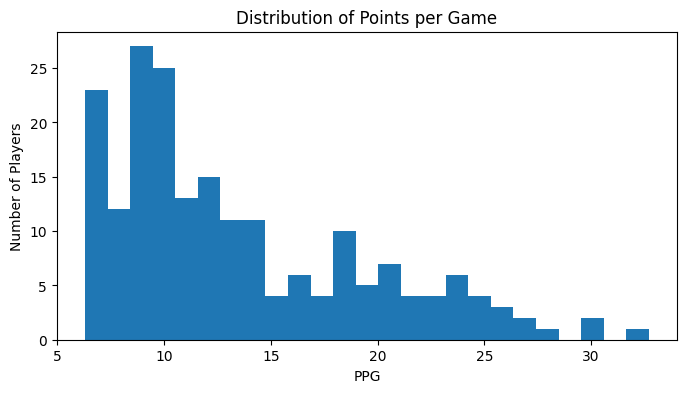

Player 1: Shai Gilgeous-Alexander
Player 2: Giannis Antetokounmpo
Cosine similarity: 0.989999801164723


In [6]:
# Playing around with endpoint to see what I have

plt.figure(figsize=(8, 4))
plt.hist(leaders['PTS'], bins=25)
plt.title("Distribution of Points per Game")
plt.xlabel("PPG")
plt.ylabel("Number of Players")
plt.show()

# Practicing making a plot (first time using jupyter notebook, bare with me)

from sklearn.metrics.pairwise import cosine_similarity
print("Player 1:", leaders.iloc[0]['PLAYER'])
vec1 = leaders.iloc[0][['PTS', 'AST', 'FG3A']].values.reshape(1, -1)
print("Player 2:", leaders.iloc[1]['PLAYER'])
vec2 = leaders.iloc[1][['PTS', 'AST', 'FG3A']].values.reshape(1, -1)
print('Cosine similarity:', cosine_similarity(vec1, vec2)[0][0])

In [7]:
# Making potential features out of leagueleaders endpoint

# 1. FG3A_over_FGA — 3-point attempt rate
leaders['FG3A_over_FGA'] = leaders['FG3A'] / leaders['FGA']

# 2. FTA_over_FGA — Foul drawing rate
leaders['FTA_over_FGA'] = leaders['FTA'] / leaders['FGA']

# 3. FT_PTS_PROPORTION — Fraction of points from free throws
leaders['FT_PTS_PROPORTION'] = (leaders['FTM'] * 1.0) / leaders['PTS']

# 4. 3PT_PTS_PROPORTION — Fraction of points from 3-pointers
leaders['3PT_PTS_PROPORTION'] = (leaders['FG3M'] * 3.0) / leaders['PTS']

# 5. USG_SURROGATE — Usage estimate per minute
leaders['USG_SURROGATE'] = (leaders['FGA'] + 0.44 * leaders['FTA'] + leaders['TOV']) / leaders['MIN']

# 6. AST_over_MIN — Assists per minute
leaders['AST_over_MIN'] = leaders['AST'] / leaders['MIN']

# 7. TOV_over_MIN — Turnovers per minute
leaders['TOV_over_MIN'] = leaders['TOV'] / leaders['MIN']

# 8. OREB_over_MIN — Offensive rebounds per minute
leaders['OREB_over_MIN'] = leaders['OREB'] / leaders['MIN']

# 9. REB_over_MIN — Total rebounds per minute
leaders['REB_over_MIN'] = leaders['REB'] / leaders['MIN']

# 10. STL_over_MIN — Steals per minute
leaders['STL_over_MIN'] = leaders['STL'] / leaders['MIN']

# 11. BLK_over_MIN — Blocks per minute
leaders['BLK_over_MIN'] = leaders['BLK'] / leaders['MIN']

# 12. TOV_per_action — Turnovers divided by shooting/assisting actions
leaders['TOV_per_action'] = leaders['TOV'] / (leaders['FGA'] + leaders['AST'])

# 13. AST_TO_RATIO — Assist-to-turnover ratio
leaders['AST_TO_RATIO'] = leaders['AST'] / leaders['TOV']

# Clean up NaN and infinity from divisions
leaders = leaders.replace([np.inf, -np.inf], np.nan).fillna(0)

# Print out the new table with Player and all engineered features
cols_to_show = ['PLAYER'] + [
    'FG3A_over_FGA', 'FTA_over_FGA', 'FT_PTS_PROPORTION', '3PT_PTS_PROPORTION',
    'USG_SURROGATE', 'AST_over_MIN', 'TOV_over_MIN', 'OREB_over_MIN', 'REB_over_MIN',
    'STL_over_MIN', 'BLK_over_MIN', 'TOV_per_action', 'AST_TO_RATIO'
]

print("\n=== Engineered LeagueLeaders Features ===\n")
print(leaders[cols_to_show].head(15).to_string(index=False))



=== Engineered LeagueLeaders Features ===

                 PLAYER  FG3A_over_FGA  FTA_over_FGA  FT_PTS_PROPORTION  3PT_PTS_PROPORTION  USG_SURROGATE  AST_over_MIN  TOV_over_MIN  OREB_over_MIN  REB_over_MIN  STL_over_MIN  BLK_over_MIN  TOV_per_action  AST_TO_RATIO
Shai Gilgeous-Alexander       0.261468      0.403670           0.241590            0.192661       0.820819      0.187135      0.070175       0.026316      0.146199      0.049708      0.029240        0.085106      2.666667
  Giannis Antetokounmpo       0.045685      0.538071           0.213816            0.019737       0.803041      0.190058      0.090643       0.064327      0.347953      0.026316      0.035088        0.118321      2.096774
           Nikola Jokić       0.241026      0.328205           0.175676            0.202703       0.697984      0.277929      0.089918       0.079019      0.346049      0.049046      0.016349        0.111111      3.090909
        Anthony Edwards       0.504902      0.308824           0.192

In [8]:
# Moving on to shotdata
sample_pid = leaders.iloc[0]['PLAYER_ID']
sample_shot_path = os.path.join(RAW_PATH, f'{sample_pid}_shot_data.csv')
shot_df = pd.read_csv(sample_shot_path)

print("Columns in shot data:", shot_df.columns)
shot_df.head()

Columns in shot data: Index(['GROUP_SET', 'GROUP_VALUE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3',
       'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK',
       'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK',
       'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK',
       'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK',
       'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK',
       'WNBA_FANTASY_PTS_RANK', 'TEAM_COUNT'],
      dtype='object')


,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT
0,Location,Home,39,33,6,0.846,1308.685000,458,850,0.539,...,2,2,2,1,1,1,1,1,1,1
1,Location,Neutral,1,1,0,1.000,37.616667,8,21,0.381,...,1,1,3,3,3,3,3,1,3,1
2,Location,Road,36,29,7,0.806,1251.328333,394,785,0.502,...,3,3,1,2,2,2,2,1,2,1
